In [1]:
import pandas
import helpers
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
from sklearn.cross_validation import KFold, cross_val_score, train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

%matplotlib inline

# Подход 1: градиентный бустинг "в лоб"

In [2]:
X, y, X_kaggle = helpers.get_clean_data()
kf = KFold(y.size, n_folds=5, shuffle=True, random_state=42)

## Подбираем оптимальное число деревьев

In [3]:
scores = []
nums = [10, 20, 30, 50, 100, 250]
for n in nums:
    print '#', str(n)
    model = GradientBoostingClassifier(n_estimators=n, random_state=42)
    start_time = datetime.datetime.now()
    model_scores = cross_val_score(model, X, y, cv=kf, scoring='roc_auc', n_jobs=-1)
    print 'Time elapsed:', datetime.datetime.now() - start_time
    print model_scores
    scores.append(np.mean(model_scores))

# 10
Time elapsed: 0:00:23.418483
[ 0.66383799  0.66635457  0.66360047  0.66529818  0.66516226]
# 20
Time elapsed: 0:00:45.245463
[ 0.68083889  0.68272733  0.67969876  0.68349322  0.6855512 ]
# 30
Time elapsed: 0:01:05.936948
[ 0.68892093  0.68934663  0.68712298  0.69180597  0.69283583]
# 50
Time elapsed: 0:01:50.692144
[ 0.69627399  0.69747878  0.69470891  0.69921915  0.69979097]
# 100
Time elapsed: 0:03:49.235815
[ 0.70515496  0.706077    0.7042995   0.7074682   0.70811523]
# 250
Time elapsed: 0:09:34.369278
[ 0.71545972  0.7146266   0.71535522  0.71730846  0.71680663]


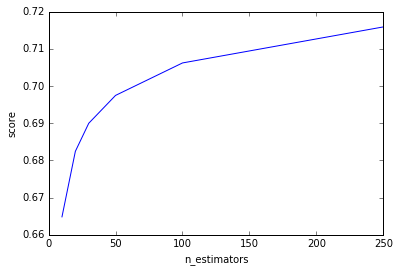

In [4]:
plt.plot(nums, scores)
plt.xlabel('n_estimators')
plt.ylabel('score')
plt.show()

Кросс-валидация для градиентного бустинга с 30 деревьями заняла 0:01:05. Показатель метрики качества AUC-ROC в таком случае равен 0.69.

Увеличение количества деревьев также увеличивает показатель метрики AUC-ROC, приближая его к 0.72. Для достижения большего качества имеет смысл использовать более 30 деревьев. Для ускорения обучения можно использовать не всю выборку, а некоторое ее подмножество — например, половину объектов. Также можно уменьшить глубину деревьев (max_depth).